In [1]:
# Descarga de archivos de ProfNER
!wget https://zenodo.org/record/4563995/files/profner.zip?download=1
# Si el unzip no funciona, revisar cual es el nombre de descarga del archivo
!unzip  profner.zip?download=1

Se han truncado las últimas 5000 líneas del flujo de salida.
  inflating: profner/subtask-1/test-background-txt-files/1243953060050763778.txt  
  inflating: profner/subtask-1/test-background-txt-files/1243988693947486209.txt  
  inflating: profner/subtask-1/test-background-txt-files/1244173600753618945.txt  
  inflating: profner/subtask-1/test-background-txt-files/1244319340062822405.txt  
  inflating: profner/subtask-1/test-background-txt-files/1247000104193712129.txt  
  inflating: profner/subtask-1/test-background-txt-files/1247263989249212416.txt  
  inflating: profner/subtask-1/test-background-txt-files/1247465550931988482.txt  
  inflating: profner/subtask-1/test-background-txt-files/1249075777544556545.txt  
  inflating: profner/subtask-1/test-background-txt-files/1249253729720766466.txt  
  inflating: profner/subtask-1/test-background-txt-files/1249964965546668034.txt  
  inflating: profner/subtask-1/test-background-txt-files/1249980196838682624.txt  
  inflating: profner/subta

Funciones de carga y preparación de datos

In [2]:
import sys
import os
import pandas as pd
def get_tweet_content(list_paths):
  """
    Función para guardar en un diccionario el contenido de archivos txt
    que se introduce en su entrada.
    Devuelve un diccionario en el que las claves son el id del tweet, y
    el valor el texto del tweet.
  """
  output_dict = dict()
  for i in list_paths:
    tweet_id = i.split("/")[-1].split(".txt")[0]
    with open(i) as f:
      output_dict[int(tweet_id)] = f.read()

  return output_dict

def get_profner_data(profner_path_data):
    # Obtenemos el path a los txt de los tweets.
    path_to_txt = profner_path_data+"subtask-1/train-valid-txt-files/"
    tweets_train_files = [path_to_txt+"train/"+i for i in os.listdir(path_to_txt+"train/")]
    tweets_valid_files = [path_to_txt+"valid/"+i for i in os.listdir(path_to_txt+"valid/")]
    # Obtenemos diccionarios en los que el key es el tweet_id y el value el texto del tweet.
    train_txt_content = get_tweet_content(tweets_train_files)
    valid_txt_content = get_tweet_content(tweets_valid_files)

    # Cargamos dos dataframes con los tweet_id y la categoría de los tweets
    path_to_labeled = profner_path_data+"subtask-1/"
    train_tweets = pd.read_csv(path_to_labeled+"train.tsv",sep="\t")
    valid_tweets = pd.read_csv(path_to_labeled+"valid.tsv",sep="\t")

    # Introducimos a los df el campo de texto mapeando los diccionarios con tweet_id
    train_tweets["tweet_text"] = train_tweets['tweet_id'].map(train_txt_content)
    train_tweets["set"] = "train"
    valid_tweets["tweet_text"] = valid_tweets['tweet_id'].map(valid_txt_content)
    valid_tweets["set"] = "valid"

    # Concatenamos el resultado
    output_df = pd.concat([train_tweets,valid_tweets],axis=0)
    # Eliminamos retorno de carro
    output_df["tweet_text"] = output_df.tweet_text.apply(lambda x: x.replace('\n', ' '))
    return output_df[["tweet_id","tweet_text","label","set"]].reset_index(drop=True)

In [3]:
# Instalamos textacy
!pip install textacy
# Instalamos spacy y uno de sus modelos
!pip install spacy
# Descargamos modelos pre-entrenados de spacy.
!python -m spacy download en_core_web_sm
!python -m spacy download es_core_news_sm
#Instalamos emoji_extractor y emoji
!pip install emoji_extractor
!pip install emoji

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 210.7/210.7 kB 3.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 33.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 320.3/320.3 kB 29.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 66.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 70.1 MB/s eta 0:00:00
2023-10-05 18:23:28.861474: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-10-05 18:23:29.978571: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 22.2 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('

# Ejercicio


En este ejercicio se trabajará con un conjunto de datos reales publicados para la shared-task [ProfNER](https://temu.bsc.es/smm4h-spanish/), celebrada en el año 2021. Específicamente, se utilizarán los datos textuales de la subtarea 1, centrada en la clasificación de textos. Este conjunto de datos son tweets en español que tienen asignada una etiqueta numérica, que representa la presencia (valor 1) o no (valor 0) de menciones de profesiones en el tweet. Por si fuera de tu interés, el proceso de obtención, selección y anotación de datos está descrita en [este enlace.](https://temu.bsc.es/smm4h-spanish/?p=4003).

Para el ejercicio debéis entrenar diferentes modelos de clasificación que permitan clasificar correctamente los tweets. Para ello será necesario crear y utilizar funciones de preprocesado de datos similares a las vistas en clase, aplicar estrategias de vectorización de trextos como TF-IDF o embeddings, y entrenar/evaluar modelos de clasificación. Para que os sirva de orientación, los criterios de evaluación del ejercicio serán los siguientes:

-	**Análisis exploratorio, pre-procesado y normalización de los datos (30%)**:
        -	El ejercicio deberá contener un análisis exploratorio de los datos como número de documentos, gráficas de distribución de longitudes y/o wordclouds, entre otros análisis que se os pudieran ocurrir. Vuestros ejercicios deberán incorporar al menos los análisis exploratorios vistos en clase.

    -	También tendréis que tener funciones para normalizar textos que permitan eliminar palabras vacías, quitar símbolos de puntuación y lematizar o hacer stemming.  

-	**Vectorización de textos (40%)**

    En clase hemos visto diferentes estrategias de vectorización como TF-IDF y Word Embeddings. También hemos visto como incorporar características adicionales utilizando el sentimiento de los documentos. Para este ejercicio sois libres de utilizar la estrategia de vectorización que queráis, pero:
  -	Si decidís utilizar TF-IDF será necesarios que incorporéis a modelo características adicionales de sentimiento utilizando recursos adicionales (como por ejemplo la librería TextBlob).
  -	Si optáis por representar el texto mediante embeddings, dado que en clase no se profundizado sobre el tema no será necesario incorporar esas características adicionales. Si decidís esta segunda opción, podéis utilizar los embeddings en español que vimos en clase

-	**Entrenamiento y validación del sistema (30%)**
  -	En el proceso de entrenamiento del modelo tendréis que testear al menos 3 modelos de clasificación. El procedimiento debe ser similar al visto en clase, en el que primero estimábamos el rendimiento de varios algoritmos de forma general, para posteriormente seleccionar el mejor para ajustar los hiperparámetros.



## Imports


In [4]:
import warnings
warnings.simplefilter('ignore')
import matplotlib.pyplot as plt
import numpy as np
import re
from emoji_extractor.extract import Extractor
import nltk
nltk.download('stopwords')
from nltk.tokenize import TweetTokenizer
from nltk.corpus import stopwords
import es_core_news_sm
import spacy
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, confusion_matrix
from sklearn.metrics import classification_report

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


## Funciones

In [5]:
# Preparar diccionario de emojis
def load_emoji_sentiment(path):
  # Cargamos el csv de emoji_sentiment
  emoji_sent_df = pd.read_csv(path,sep=",")
  # Calculamos los scores dividiendo el número de emojis negativos y entre el total
  emoji_sent_df["Negative"] = emoji_sent_df["Negative"]/emoji_sent_df["Occurrences"]
  emoji_sent_df["Neutral"] = emoji_sent_df["Neutral"]/emoji_sent_df["Occurrences"]
  emoji_sent_df["Positive"] = emoji_sent_df["Positive"]/emoji_sent_df["Occurrences"]
  # Transformamos a dict
  emoji_sent_df = emoji_sent_df.set_index('Emoji')
  emoji_dict = emoji_sent_df.to_dict(orient="index")
  return emoji_dict

In [6]:
# Función para extraer emojis del texto en formato lista
def extract_emojis(text):
  extract = Extractor()
  emojis = extract.count_emoji(text, check_first=False)
  emojis_list = [key for key, _ in emojis.most_common()]
  return emojis_list

In [7]:
# Calcula el sentimiento de los emojis de una lista utilizando el diccionario
# de emoji sentiment score generado previamente con la función load_emoji_sentiment()
# Se puede extraer el valor de positividad de los emojis con la option "positive"
# Se puede extraer el valor de neutralidad de los emojis con la option "neutral""
# Se puede extraer el valor de e negatividad de los emojis con la option "negative""

def get_emoji_sentiment(lista, option = "positive"):
  output = 0
  for emoji in lista:
    try:
      if option == "positive":
        output = output + emoji_sent_dict[emoji]["Positive"]
      elif option =="negative":
        output = output + emoji_sent_dict[emoji]["Negative"]
      elif option =="neutral":
        output = output + emoji_sent_dict[emoji]["Neutral"]
    except Exception as e:
      continue
  return output

In [8]:
# Eliminar los emojis de un texto. Esto es útil porque una vez extraido los emojis
# puede interesarnos tener un texto sin presencia de emojis para mejor análisis.
def clean_emoji(text):
    # Poner todos los comandos de http://www.unicode.org/Public/emoji/1.0/emoji-data.txt
    emoji_pattern = re.compile("["
        u"\U0001F300-\U0001F6FF"  # symbols & pictographs
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
        u'\u2600-\u26FF\u2700-\u27BF'
        u'\u2934' u'\u2935' u'\u2B05' u'\u2B06' u'\u2B07' u'\u2B1B' u'\u2B1C'
        u'\u2B50' u'\u2B55' u'\u3030' u'\u303D' u'\u3297' u'\u3299' u'\u00A9'
        u'\u00AE' u'\u203C' u'\u2049' u'\u2122' u'\u2139' u'\u2194-\u2199'
        u'\u21A9' u'\u21AA' u'\u231A' u'\u231B' u'\u2328' u'\u23CF'
        u'\u23E9-\u23F3' u'\u23F8' u'\u23F9' u'\u23FA' u'\u24C2' u'\u25AA'
        u'\u25AB' u'\u25B6' u'\u25C0' u'\u25FB' u'\u25FD' u'\u25FC' u'\u25FE'
        ']+', flags=re.UNICODE)
    string2 = re.sub(emoji_pattern,r' ',text)
    return string2

In [9]:
# Tokenizar los tweets con el tokenizador "TweetTokenizer" de NLTK
def tokenize(texto):
  tweet_tokenizer = TweetTokenizer()
  tokens_list = tweet_tokenizer.tokenize(texto)
  return tokens_list

# Quitar stop words de una lista de tokens
def quitar_stopwords(tokens):
    stop_words = set(stopwords.words('spanish'))
    filtered_sentence = [w for w in tokens if not w in stop_words]
    return filtered_sentence


# Eliminar signos de puntuación de una lista de tokens
# (nos quedamos sólo lo alfanumérico en este caso)
def quitar_puntuacion(tokens):
    words=[word for word in tokens if word.isalnum()]
    return words


# Lemmatization de los tokens. Devuelve una string entera para hacer la tokenización
# con NLTK
nlp = spacy.load("es_core_news_sm")
def lematizar(tokens):
    sentence = " ".join(tokens)
    mytokens = nlp(sentence)
    # Lematizamos los tokens y los convertimos  a minusculas
    mytokens = [ word.lemma_ if word.lemma_ != "-PRON-" else word.lower_ for word in mytokens ]
    # Extraemos el text en una string
    return " ".join(mytokens)

#Stemming
import string
from nltk.stem import SnowballStemmer
stemmer = SnowballStemmer(language="spanish")
def stem(tokens):
    tokens = [ stemmer.stem(token) for token in tokens]
    return tokens


## 1. Obtención del corpus
Para la obtención de los datos utilizamos la función `get_profner_data()`, que prepara los datos en formato Pandas dataframe.

In [10]:
profner_path = "./profner/"
datos_ejercicio = get_profner_data(profner_path)

In [11]:
datos_ejercicio.head(4)

,tweet_id,tweet_text,label,set
0,1256007275807997953,CHINA: libera una pandemia EE.UU: libera OVNIS...,0,train
1,1257909427677601792,San Francisco (EEUU) hace 100 años tras vivir ...,0,train
2,1281580572415066112,Porfi poneos la mascarilla o tendremos 28 nuev...,0,train
3,1271348112733470720,El nuevo „covid normas y reglas recibimiento“ ...,0,train


## 2. Análisis exploratorio

El análisis exploratorio nos permitirá extraer las principales características de este conjunto de datos. Para ello vamos a detenernos en diferentes aspectos:

###  **Número de documentos y columnas del dataset**





In [12]:
print("El dataset contiene un total de {} documentos (tweets)".format(len(datos_ejercicio.tweet_text)))
print("El dataset contiene un total de {} columnas (features)".format(datos_ejercicio.shape[1]))

El dataset contiene un total de 8000 documentos (tweets)
El dataset contiene un total de 4 columnas (features)


### **Valores nulos y duplicados**:

In [13]:
print("Existen {} tweets duplicados".format(np.sum(datos_ejercicio.duplicated(subset=["tweet_text"]))))
# Quitaremos esos duplicados si hubiera
datos_ejercicio = datos_ejercicio.drop_duplicates()
print("Despues de quitar duplicados tenemos un conjunto de {} tweets".format(datos_ejercicio.shape[0]))


Existen 0 tweets duplicados
Despues de quitar duplicados tenemos un conjunto de 8000 tweets


### **Cantidad de tweets según labels (mencióna profesión o no)**:

Recordemos que:
  
  * label = 0 : No hay mención a profesiones en el tweet.
  * label = 1 : Sí hay mención a profesiones en el tweet.

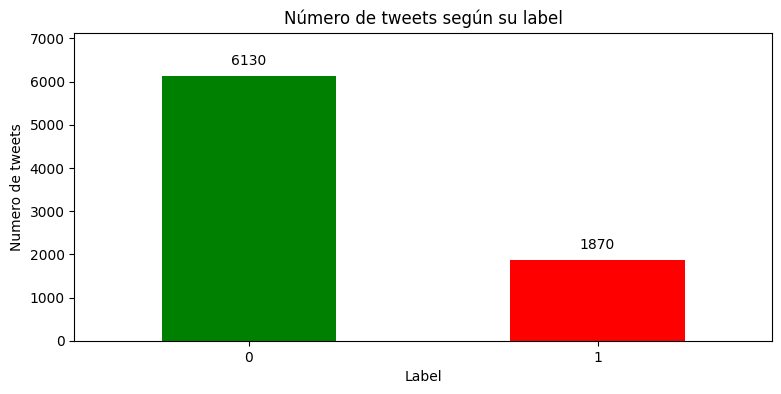

In [21]:
# Distribución de los tweets según su label
# ==============================================================================
fig, ax = plt.subplots(figsize=(9,4))

ax1 = datos_ejercicio["label"].value_counts()
graph = ax1.plot(kind="bar", ax=ax, xlabel="Label", ylabel= "Numero de tweets", ylim=(0,max(ax1)+1000), color=["green","red"])
ax.bar_label(graph.containers[0], padding = 6, size = 10)
ax.set_title("Número de tweets según su label")

plt.xticks(rotation=0)
plt.show()


In [15]:
print('De estos, {} no tienen mención de profesiones, mientras que {} sí'.format(datos_ejercicio['label'].value_counts()[0],datos_ejercicio['label'].value_counts()[1]))

De estos, 6130 no tienen mención de profesiones, mientras que 1870 sí


Las etiquetas están bastante descompensadas, lo cual nos puede dar problemas a la hora de entrenar el modelo. Hay una cantidad casi 4 veces mayor de tweets que no mencionan profesiones que de aquellos que sí.

### **Distribución de los caracteres según label**:

Para ello primero debemos calcular la longitud de cada uno de los tweets. También observaremos la longitud media y su desviación típica según su label.

In [23]:
datos_ejercicio["char_len"] = datos_ejercicio["tweet_text"].apply(lambda x: len(x))

In [24]:
print('El número medio de caracteres cuando label es 0 es de  {} y su desviación típica de {}'.format(round(datos_ejercicio.groupby("label")["char_len"].mean()[0],2),round(datos_ejercicio.groupby("label")["char_len"].std()[0],2)))
print('El número medio de caracteres cuando label es 1 es de  {} y su desviación típica de {}'.format(round(datos_ejercicio.groupby("label")["char_len"].mean()[1],2),round(datos_ejercicio.groupby("label")["char_len"].std()[1],2)))

El número medio de caracteres cuando label es 0 es de  187.48 y su desviación típica de 83.02
El número medio de caracteres cuando label es 1 es de  231.87 y su desviación típica de 63.11


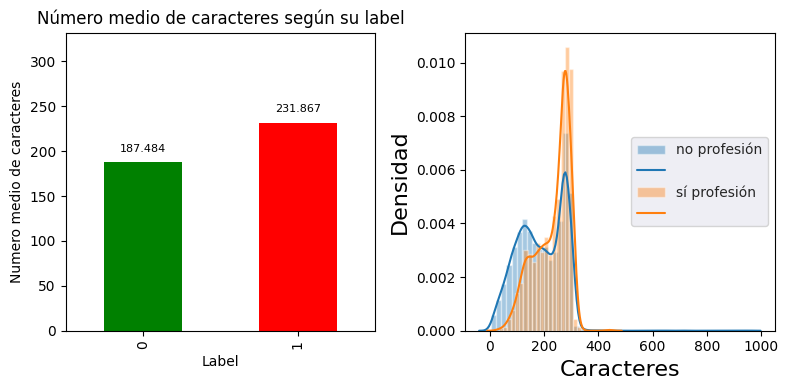

In [25]:
import seaborn as sns

fig, axs = plt.subplots(1,2,figsize=(8,4))

#Figura 1
ax1 = datos_ejercicio.groupby("label")["char_len"].mean()
graph = ax1.plot(kind="bar", ax=axs[0], xlabel="Label", ylabel= "Numero medio de caracteres", ylim=(0,max(ax1)+100), color=["green","red"])
axs[0].bar_label(graph.containers[0], padding = 6, size = 8)
axs[0].set_title("Número medio de caracteres según su label")


# Figura 2
sns.set_style("darkgrid")
# añadimos series para cada categoría (eligiendo la seríe de char_len)
axs[1] = sns.distplot(datos_ejercicio[datos_ejercicio["label"] == 0].char_len, hist=True, label="no profesión")
sns.distplot(datos_ejercicio[datos_ejercicio["label"] == 1].char_len, hist=True, label="sí profesión", ax=axs[1])
axs[1].legend(labels=["no profesión", "", "sí profesión", ""], loc=5)

# Definimos el título de los ejes:
axs[1].set_xlabel('Caracteres', fontsize=16)
axs[1].set_ylabel('Densidad', fontsize=16)

# Ajustamos el espaciado entre los subplots:
plt.tight_layout()

# Finalmente mostramos el gráfico:
plt.show()

Ambos gráficos nos muestran cómo aquellos tweets con un mayor número de caracteres tendrán una mayor probabilidad de mencionar profesiones. Sin embargo, esto no es concluyente, por lo que no puede ser el único criterio en el que nos basemos a la hora de clasificar.

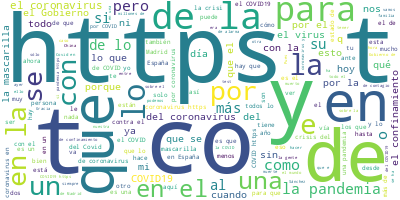

In [ ]:
from wordcloud import WordCloud

label_1 = datos_ejercicio[datos_ejercicio.label==1].tweet_text
label_0 = datos_ejercicio[datos_ejercicio.label==0].tweet_text

string_label_1 = ",".join(label_1.to_list())
string_label_0 = ",".join(label_0.to_list())

wordcloud = WordCloud(background_color='white', max_words=400)
wordcloud.generate(string_label_0)
wordcloud.to_image()

Si miramos las palabras más repeditas, prácticamente todas son stop words, junto a 'https', que hace referencia a la gran cantidad de tweets con url. Por ello, en el procesado que realizaremos ahora, debemos eliminar estas stop words.

## 3. Preprocesado y Normalización

Vamos a proceder a normalizar los datos. Para ello vamos a utilizar las funciones anteriormente definidas.

- Eliminaremos espacios innecesarios
- Transformaremos a minúsculas
- Tokenizaremos
- Quitaremos stop words
- Quitaremos puntuación
- Lematizaremos


### Eliminar espacios:

In [ ]:
# Función para eliminar espacios
def eliminar_espacios(text):
    return  " ".join(text.split())

# Quitar Espacios
datos_ejercicio["normaliza"] = datos_ejercicio["tweet_text"].apply(lambda x: eliminar_espacios(x))

### Transformar a minúsculas:

In [ ]:
# Función para convertir a minúsculas
def texto_to_lower(text):
  return text.lower()

# To Lower
datos_ejercicio["normaliza"] = datos_ejercicio["normaliza"].apply(lambda x: texto_to_lower(x))

### Tokenizar:

In [ ]:
# Función para Tokenizar los tweets con el tokenizador "TweetTokenizer" de NLTK
def tokenize(texto):
  tweet_tokenizer = TweetTokenizer()
  tokens_list = tweet_tokenizer.tokenize(texto)
  return tokens_list

datos_ejercicio["normaliza"] = datos_ejercicio["normaliza"].apply(lambda x: tokenize(x))

Vamos a crear tres features diferentes: num_urls, num_menciones, num_hastags. Que nos servirán para caracterizar los diferentes tweets.

In [ ]:
def calculate_urls(tokens):
  contador=0
  for i in tokens:
    if i.startswith('http'):
      contador+=1
  return contador

def calculate_menciones(tokens):
  contador=0
  for i in tokens:
    if i.startswith('@'):
      contador+=1
  return contador

def calculate_hastags(tokens):
  contador=0
  for i in tokens:
    if i.startswith('#'):
      contador+=1
  return contador

In [ ]:
datos_ejercicio['num_urls']=datos_ejercicio.normaliza.apply(lambda x:calculate_urls(x))
datos_ejercicio['num_menciones']=datos_ejercicio.normaliza.apply(lambda x:calculate_menciones(x))
datos_ejercicio['num_hastags']=datos_ejercicio.normaliza.apply(lambda x:calculate_hastags(x))

### Eliminar stop words:

In [ ]:
# Función para quitar stop words de una lista de tokens
def quitar_stopwords(tokens):
    stop_words = set(stopwords.words('spanish'))
    filtered_sentence = [w for w in tokens if not w in stop_words]
    return filtered_sentence


datos_ejercicio["normaliza"] = datos_ejercicio["normaliza"].apply(lambda x: quitar_stopwords(x))

### Eliminar signos de puntuación:

In [ ]:
# Eliminar signos de puntuación de una lista de tokens
# (nos quedamos sólo lo alfanumérico en este caso)
def quitar_puntuacion(tokens):
    words=[word for word in tokens if word.isalnum()]
    return words

datos_ejercicio["normaliza"] = datos_ejercicio["normaliza"].apply(lambda x: quitar_puntuacion(x))

### Lematizar:

In [ ]:
# Lemmatization de los tokens. Devuelve una string entera para hacer la tokenización
# con NLTK
nlp = spacy.load("es_core_news_sm")
def lematizar(tokens):
    sentence = " ".join(tokens)
    mytokens = nlp(sentence)
    # Lematizamos los tokens y los convertimos  a minusculas
    mytokens = [ word.lemma_ if word.lemma_ != "-PRON-" else word.lower_ for word in mytokens ]
    # Extraemos el text en una string
    return " ".join(mytokens)

datos_ejercicio["normaliza"] = datos_ejercicio["normaliza"].apply(lambda x: lematizar(x))

### Análisis de sentimiento

A continuación, vamos a realizar un análisis de sentimiento que nos ayude a mejorar el funcionamiento del algoritmo. Para ello, como los tweets están escritos en español, utilizamos la siguiente alternativa:

- Spanish Emotion Lexicon (SEL):

Este lexicon contiene 2036 palabras clasificadas según su uso en 6 estados de ánimo diferentes emociones (joy, anger, fear, sadness, surprise, and disgust).Vamos a "binarizar" cada uno de los términos, según sean términos altamente probables de sentimientos positivos (joy y surprise) y negativos (el resto). Al terminar, cada palabra dispondrá de un score positivo o negativo según su PFA.

Descargamos los datos de Spanish Emotion Lexicon de la web de [Grigori Sidorov](https://www.cic.ipn.mx/~sidorov/#SEL)

In [ ]:
url_path = "https://www.cic.ipn.mx/~sidorov/SEL.txt"
sel_lexicon = pd.read_csv(url_path,sep="\t", encoding="latin-1")

Binarizamos los sentimientos:

In [ ]:
dicc_mapping = {"Alegría":"positive",
                "Sorpresa":"positive",
                "Tristeza":"negative",
                "Enojo":"negative",
                "Miedo":"negative",
                "Repulsión":"negative"}

sel_lexicon["Categoría"] = sel_lexicon["Categoría"].map(dicc_mapping)

positive_words = dict(zip(sel_lexicon[sel_lexicon["Categoría"]=="positive"].Palabra, sel_lexicon[sel_lexicon["Categoría"]=="positive"][' PFA']))
negative_words = dict(zip(sel_lexicon[sel_lexicon["Categoría"]=="negative"].Palabra, sel_lexicon[sel_lexicon["Categoría"]=="negative"][' PFA']))

Creamos una función que muestre el sentimiento del tweet en función a un score. Scores negativos significarán sentimiento negativo, mientras que positivos sentimiento positivo.

In [ ]:
def calculate_sentiment(frase, positive_words, negative_words):
  """
  Función para calcular el score de sentimiento de una frase

  Args:
    frase [str]: Frase pre-preprocesada en español. Debe venir lematizada.
    positive_words [dict]: Diccionario de palabras positivas extraidas de SEL
    negative_words [dict]: Diccionario de palabras negativas extraídas de SEL

  Out:
    Sentiment score
  """
  score = 0
  for i in frase.split():
    if i in positive_words:
      score = score + float(positive_words[i])
    elif i in negative_words:
      score = score - float(negative_words[i])
    else:
      score = score + 0

  return score

Aplicamos función al dataset completo:

In [ ]:
datos_ejercicio["sentimiento"] = datos_ejercicio["normaliza"].apply(lambda x: calculate_sentiment(x, positive_words, negative_words))

In [ ]:
print(datos_ejercicio.groupby("label")["sentimiento"].mean())
print(datos_ejercicio.groupby("label")["sentimiento"].std())

label
0   -0.011359
1    0.012751
Name: sentimiento, dtype: float64
label
0    0.643875
1    0.653200
Name: sentimiento, dtype: float64


Observamos que aquellos tweets que hablan de profesiones tienen una mayor positividad que aquelos que no lo hacen, pero sin ser significativo.

## 4. Vectorización


Una vez hemos limpiado y procesado el texto, vamos a extraer características utilizando TFIDFVectorizer:
- unigramas, bigramas y trigramas
- Que el sistema no considere los elementos que salgan en menos del 0,5% de los documentos.

In [ ]:
vectorizador = TfidfVectorizer(min_df=0.005, ngram_range = (1,3))
vector_data = vectorizador.fit_transform(datos_ejercicio["normaliza"])

In [ ]:
extra_features = datos_ejercicio[["sentimiento", "num_urls", "num_menciones", "num_hastags"]]

Utilizamos la librería scipy (función sparse.hstack) para unir las características TFIDF (contenidas en 'vector_data') con las que acabamos de seleccionar ('extra_features'). Esta unión nos generará una matriz X que utilizaremos para hacer el train-test split posteriormente:

In [ ]:
import scipy as sp
# Extraemos las etiquetas y las asignamos a la variable y
y = datos_ejercicio["label"].values.astype(np.float32)
# Unimos las características TFIDF con las características previamente seleccionadas
# Extraemos los valores (values) de las extra_features, que es un dataframe
X = sp.sparse.hstack((vector_data,extra_features.values),format='csr')

También vamos a extraer el nombre de las caracteríticas por si quisieramos utilizarlos con posterioridad.

In [ ]:
X_columns=list(vectorizador.get_feature_names_out())+extra_features.columns.tolist()

## 5. Entrenamiento y evaluación de modelos


Antes de entrenar y evaluar del modelo, lo primero que haremos será dividir los datos en train/test.

### División en train/test

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
print(X_train.shape)
print(X_test.shape)

(6000, 482)
(2000, 482)


### Decision de modelo de ML a utilizar

En primer lugar se ha generado una función para medir la calidad de varios modelos estándar de forma fácil y ver sus resultados.

La función hace un KFold y evalua diferentes modelos con una métrica de evblauación:

In [ ]:
# Definimos las funcionalidades pertinentes de sklearn:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
import warnings
# Definimos la función encargada de evaluar los modelos:
def model_evaluation(models, score, X, y):
      results = []
      names = []
      #PAra cada modelo
      for name, model in models:
          warnings.filterwarnings('ignore')
          # Generamos un Kfold
          KF = KFold(n_splits = 10, shuffle = True, random_state = 98)

          # hacemos croos_val
          cv_results = cross_val_score(model, X, y, cv = KF, scoring = score, verbose = False)

          # Guardamos los resultados:
          results.append(cv_results)
          names.append(name)

          # Mostramos los resultados numéricamente:
          print('Metric: {} , KFold '.format(str(score)))
          print("%s: %f (%f) " % (name, cv_results.mean(), cv_results.std()))

      return results, names

Una vez definida la función, podemos definir los modelos con los que hacer la evaluación. En este caso hemos incorporado los siguientes:
- XGB
- Random Forest
- Regresión logística
- Decision tree
- Naive bayes

In [ ]:
# Cargamos los modelos
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

# Definimos los modelos y generamos una lista con cada uno de ellos:
models = [
         ("XGB", XGBClassifier(n_jobs=-1, random_state=1234)),
         ("RF", RandomForestClassifier(n_jobs=-1, random_state=1234)),
         ("Logistic",LogisticRegression(random_state=30)),
         ("Decision tree",DecisionTreeClassifier()),
         ("GaussianNB",GaussianNB())
]

evaluation_score = "accuracy"

model_evaluation(models,  evaluation_score, X_train.toarray(), y_train)

Metric: accuracy , KFold 
XGB: 0.838667 (0.010509) 
Metric: accuracy , KFold 
RF: 0.839000 (0.013358) 
Metric: accuracy , KFold 
Logistic: 0.828167 (0.009674) 
Metric: accuracy , KFold 
Decision tree: 0.768833 (0.015865) 
Metric: accuracy , KFold 
GaussianNB: 0.714833 (0.016856) 


([array([0.84      , 0.85333333, 0.81666667, 0.845     , 0.85      ,
         0.84166667, 0.825     , 0.83666667, 0.84333333, 0.835     ]),
  array([0.84      , 0.85      , 0.81333333, 0.84333333, 0.85666667,
         0.845     , 0.81666667, 0.84333333, 0.84833333, 0.83333333]),
  array([0.82      , 0.835     , 0.80833333, 0.82333333, 0.83666667,
         0.83833333, 0.81833333, 0.83      , 0.83333333, 0.83833333]),
  array([0.78333333, 0.78166667, 0.74166667, 0.77      , 0.78166667,
         0.77833333, 0.74166667, 0.78333333, 0.755     , 0.77166667]),
  array([0.68333333, 0.725     , 0.725     , 0.72166667, 0.70166667,
         0.74166667, 0.71      , 0.695     , 0.73166667, 0.71333333])],
 ['XGB', 'RF', 'Logistic', 'Decision tree', 'GaussianNB'])

El mejor modelo, con una accuracy de 0.84 es el Random Forest Classifier. No obstante, también se podría realizar un XGB. Nosotros nos decantamos por el primero.

A continuación, definimos las variables para hacer una grid_search y obtener los mejores hiperparámetros:

In [ ]:
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

In [ ]:
# define models and parameters
model = RandomForestClassifier()
# Number of trees in random forest
n_estimators = [50,100,200]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [10,20,50]
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
criterion = ["gini", "entropy", "log_loss"]

In [ ]:
#n_estimators=n_estimators,,max_depth=max_depth,bootstrap=bootstrap,min_samples_split=min_samples_split,min_samples_leaf=min_samples_leaf
grid = dict(n_estimators=n_estimators,max_depth=max_depth,bootstrap=bootstrap,min_samples_split=min_samples_split,min_samples_leaf=min_samples_leaf, criterion=criterion)
cv = 5
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)

Vamos a entrenar el grid_search para que nos devuelva los hiperparámetros mencionados.

In [ ]:
grid_result = grid_search.fit(X_train, y_train)
# summarize results
print("Mejor accuracy: %f usando los parámetros %s" % (grid_result.best_score_, grid_result.best_params_))


Mejor accuracy: 0.841000 usando los parámetros {'bootstrap': True, 'criterion': 'log_loss', 'max_depth': 50, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 50}


Entrenamos el modelo con los resultados ofrecidos por la grid_search:

In [ ]:
from sklearn.model_selection import (KFold, cross_val_score,cross_validate)
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score

model1=RandomForestClassifier(bootstrap=True, criterion='log_loss', max_depth=50, min_samples_leaf=2, min_samples_split=10, n_estimators=50)
model1.fit(X_train,y_train)

RandomForestClassifier(criterion='log_loss', max_depth=50, min_samples_leaf=2,
                       min_samples_split=10, n_estimators=50)

Vamos a ver como funciona el modelo haciendo el predict del test y mostrando la matriz de confusión y el classification_report:

In [ ]:
y_pred = model1.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[1520   23]
 [ 264  193]]
              precision    recall  f1-score   support

         0.0       0.85      0.99      0.91      1543
         1.0       0.89      0.42      0.57       457

    accuracy                           0.86      2000
   macro avg       0.87      0.70      0.74      2000
weighted avg       0.86      0.86      0.84      2000



Tras el tuneo de hiperparámteros obtenemos una accuracy de 0.86. Sin embargo, existen verdaderis problemas para predecir la clase 1 (0.42 de recall). La puntuación es alta porque la proporción de 0 es muy grande, pero nos interesaría una mejor predicción de la clase minoritaria.

Para ello, vamos a ver si un rebalanceo de datos nos ayuda. Utilizaremos la librería imblearn.

### Rebalanceo de clases

In [ ]:
# Cargamos
from imblearn.over_sampling import SMOTE
# Creamos objetos
sm = SMOTE(sampling_strategy=0.75,random_state=42)
# Retransformamos
X_res, y_res = sm.fit_resample(X_train, y_train)

Aplicamos un rebalanceo con el que la clase 1 es un 75% de la clase 0.

In [ ]:
print("Clases sin balancear: \n0: {} \n1:".format(round(np.array(np.unique(y_train, return_counts=True))[1,0]),0),(round(np.array(np.unique(y_train, return_counts=True))[1,1])))
print("Clases balanceadas: \n0: {} \n1:".format(round(np.array(np.unique(y_res, return_counts=True))[1,0]),0),(round(np.array(np.unique(y_res, return_counts=True))[1,1])))

Clases sin balancear: 
0: 4587 
1: 1413
Clases balanceadas: 
0: 4587 
1: 3440


In [ ]:
model2=RandomForestClassifier(bootstrap=True, criterion='log_loss', max_depth=50, min_samples_leaf=2, min_samples_split=10, n_estimators=50)
model2.fit(X_res,y_res)

RandomForestClassifier(criterion='log_loss', max_depth=50, min_samples_leaf=2,
                       min_samples_split=10, n_estimators=50)

In [ ]:
y_pred2 = model2.predict(X_test)
print(confusion_matrix(y_test,y_pred2))
print(classification_report(y_test,y_pred2))

[[1493   50]
 [ 242  215]]
              precision    recall  f1-score   support

         0.0       0.86      0.97      0.91      1543
         1.0       0.81      0.47      0.60       457

    accuracy                           0.85      2000
   macro avg       0.84      0.72      0.75      2000
weighted avg       0.85      0.85      0.84      2000



Finalmente, con el rebalanceo de clases, vemos como la predicción de la clase minoritaria mejora (recall = 0.47), pese a que sigue sin ser una buena puntuación. No obstante, es la proporción que maximiza estos resultados, ya que si aumentamos o disminuimos la clase 1, la accuracy se resiente.